In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [8]:
file_path = './abalone.csv'
df = pd.read_csv(file_path)

df = df.drop('Sex', axis=1)

print("=== 결측치 현황 ===")
print(df.isnull().sum())

print("\n=== 레이블 분포 ===")
print(df['Rings'].value_counts())

=== 결측치 현황 ===
id                0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

=== 레이블 분포 ===
Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64


In [10]:
# 레이블 인코딩
label_encoder = LabelEncoder()
encoded_df = df.copy()
for column in df.columns:
    encoded_df[column] = label_encoder.fit_transform(df[column])

# 특성과 레이블 분리
X = encoded_df.drop('Rings', axis=1)
y = encoded_df['Rings']


In [12]:
# 훈련 및 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train, X_test, y_train, y_test의 shape 확인
print("\n=== 데이터셋 Shape ===")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


=== 데이터셋 Shape ===
X_train shape: (3341, 8)
X_test shape: (836, 8)
y_train shape: (3341,)
y_test shape: (836,)


In [14]:
#dt
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

#rf
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

#svm
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)

#lr
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(
    solver='saga', 
    C=0.1, 
    max_iter=5000, 
    random_state=42
)

lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_accuracy)

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)

Decision Tree Accuracy: 0.23684210526315788
Random Forest Accuracy: 0.26555023923444976
SVM Accuracy: 0.2715311004784689
Logistic Regression Accuracy: 0.2715311004784689
KNN Accuracy: 0.2727272727272727


In [15]:
# Confusion Matrix 계산 및 출력
print("\n=== Confusion Matrices ===")
print("Decision Tree:\n", confusion_matrix(y_test, y_pred_dt))
print("Random Forest:\n", confusion_matrix(y_test, y_pred_rf))
print("SVM:\n", confusion_matrix(y_test, y_pred_svm))
print("Logistic Regression:\n", confusion_matrix(y_test, y_pred_lr))
print("KNN:\n", confusion_matrix(y_test, y_pred_knn))


=== Confusion Matrices ===
Decision Tree:
 [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 1  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  1  2  6  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  4  7  7  7  4  2  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  2  4 15 15  5  5  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4 11 23 24 14  3  3  1  1  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  1  5 11 28 23 12  8  4  3  1  2  1  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  2 12 23 44 20 19 10  4  3  2  1  0  2  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  3  6 12 25 36 22 13  8  7  1  1  0  2  1  2  0  0  0  0
   0]
 [ 0  0  0  0  0  2  1  6 12 23 18 19  9  1  0  1  0  0  0  0  1  0  0  0
   0]
 [ 0  0  0  0  0  1  0  4  7 11 10  8  5  3  2  0  0  0  0  0  0  0  0  0
  

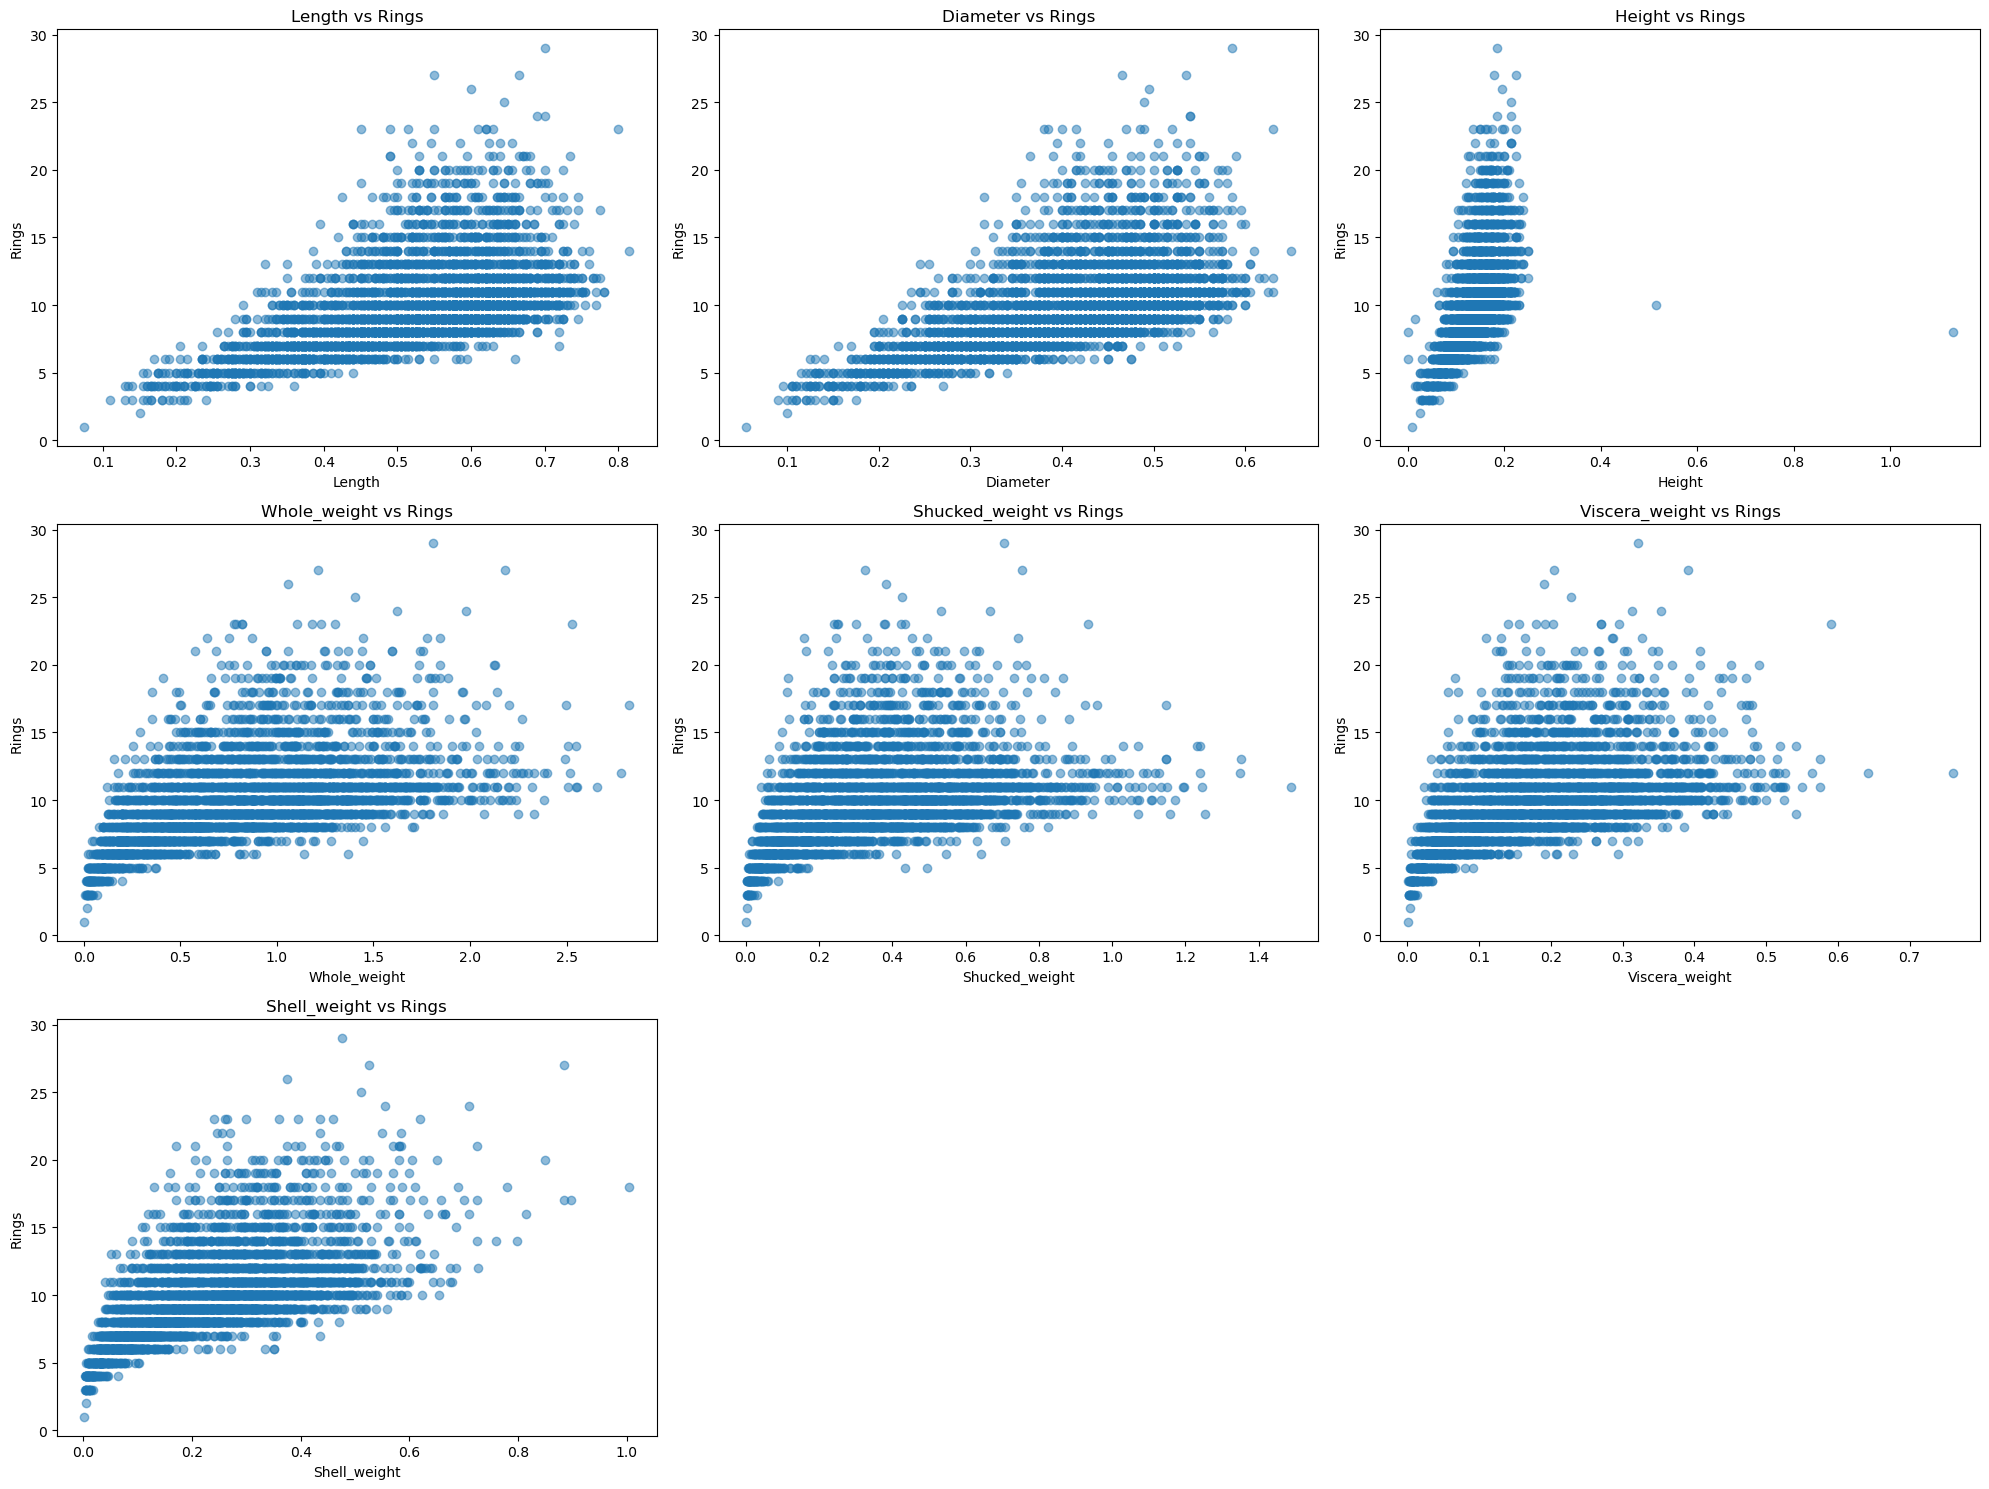

In [20]:
features = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df[feature], df['Rings'], alpha=0.5)
    plt.title(f'{feature} vs Rings')
    plt.xlabel(feature)
    plt.ylabel('Rings')
plt.tight_layout()
plt.show()
